<a href="https://colab.research.google.com/github/MadugulaHarika/Online_Fraud_Transaction/blob/main/Online_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the Data
data = pd.read_csv('/content/Online Fraud Detection dataset.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0.0


In [ ]:
#  print the information related to the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044437 entries, 0 to 5044436
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 423.3+ MB


In [ ]:
#  know the Statistics of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.044437e+06,5.044437e+06,5.044437e+06,5.044437e+06,5.044437e+06,5.044437e+06,5.044437e+06,5.044436e+06
mean,1.929507e+02,1.814871e+05,8.427213e+05,8.645685e+05,1.068492e+06,1.199078e+06,7.832390e-04,5.947147e-07
std,1.045073e+02,6.421622e+05,2.923151e+06,2.959888e+06,3.135737e+06,3.480960e+06,2.797545e-02,7.711773e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.340000e+02,1.327863e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.050000e+02,7.565867e+04,1.399000e+04,0.000000e+00,1.362373e+05,2.195156e+05,0.000000e+00,0.000000e+00
75%,2.800000e+02,2.098844e+05,1.077160e+05,1.460407e+05,9.458092e+05,1.119540e+06,0.000000e+00,0.000000e+00
max,3.540000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.555534e+08,3.555534e+08,1.000000e+00,1.000000e+00


In [ ]:
#  Count the columns with different datatypes like Category, Integer, Float

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 2
Float variables: 6


<Axes: xlabel='type', ylabel='count'>

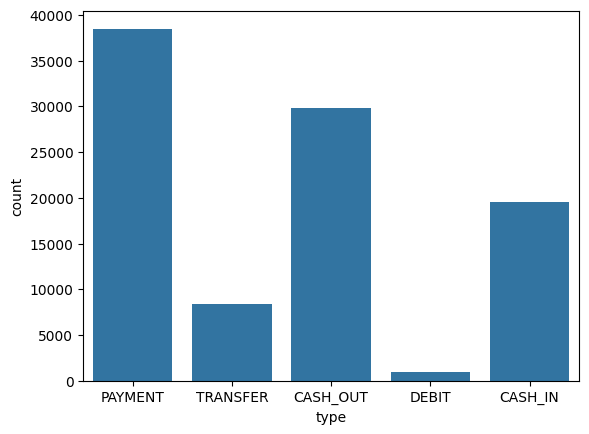

In [ ]:
 # count plot of the Payment type column using Seaborn library
sns.countplot(x='type', data=data)

In [ ]:
#  print the information related to the data after retaining the features and the target variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044437 entries, 0 to 5044436
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 423.3+ MB


In [ ]:
# check for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    1
dtype: int64

In [ ]:
# Remove the null values
df = data.dropna()

In [ ]:
# Check for null values after removing the null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# Retain the 6 features and the target variable
df = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5044436 entries, 0 to 5044435
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  float64
dtypes: float64(6), int64(1)
memory usage: 307.9 MB


In [ ]:
# Check the distribution of data among both the prediction values.
df['isFraud'].value_counts()

isFraud
0    5040485
1       3951
Name: count, dtype: int64

In [ ]:
# Load the features to a variable X
# X is created by simply dropping the diagnosis column and retaining all others
X = df.drop('isFraud',axis=1)

#Load the target variable to y
y = df['isFraud']

In [ ]:
# Do the train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Prediction with the test set
y_predict = classifier.predict(X_test)

In [ ]:
Results = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
Results.head(10)

,Actual,Predicted
1244930,0,0
3141878,0,0
4329418,0,0
1475702,0,0
2261672,0,0
2082013,0,0
370888,0,0
4729926,0,0
2347291,0,0
397171,0,0


In [ ]:
# Compute Model Accuracy.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9994363427432598


In [ ]:
# Model accuracy on training set.
# Get the predictions from the model for the training set.
y_train_pred = classifier.predict(X_train)
print(accuracy_score(y_train,y_train_pred))

0.9994375698258761


In [ ]:
#Generate the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1511555     619]
 [    234     923]]


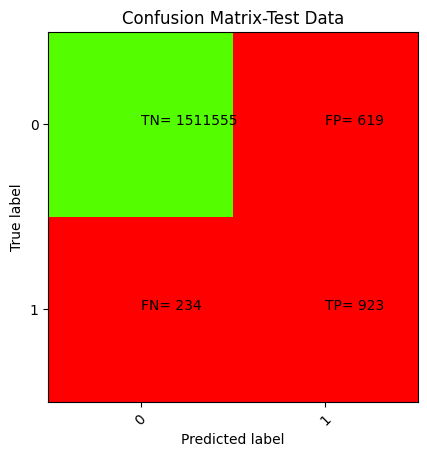

In [ ]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [ ]:
#Calculate common error metrics for a 2-class classifier
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1512174
           1       0.60      0.80      0.68      1157

    accuracy                           1.00   1513331
   macro avg       0.80      0.90      0.84   1513331
weighted avg       1.00      1.00      1.00   1513331

